# Dow Jones Industrial Average

# Промышленный индекс Доу — Джонса

### Данные

https://in.finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI

### Описание

https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BC%D1%8B%D1%88%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%94%D0%BE%D1%83_%E2%80%94_%D0%94%D0%B6%D0%BE%D0%BD%D1%81%D0%B0

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 22})

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, History

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [2]:
sample_df = pd.read_csv('./data/DJI_ds.tsv')

In [3]:
sample_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


### Взглянем на статистики

In [4]:
sample_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8518.000000,8518.000000,8518.000000,8518.000000,8518.000000,8.518000e+03
mean,9280.711688,9337.482947,9222.596622,9283.362836,9283.362836,1.340533e+08
std,5848.969803,5872.617021,5824.201174,5849.593378,5849.593378,1.176961e+08
min,1243.709961,1251.209961,1235.530029,1242.050049,1242.050049,2.530000e+06
25%,3527.624939,3542.145081,3511.837524,3527.644959,3527.644959,2.583250e+07
50%,9785.145019,9857.379883,9725.279785,9785.754883,9785.754883,9.940500e+07
75%,12286.072754,12355.070313,12220.840332,12287.834717,12287.834717,2.208250e+08
max,26833.470703,26951.810547,26789.080078,26828.390625,26828.390625,8.239400e+08


In [5]:
sample_df = sample_df.drop(['Date'],axis=1) #дропнем дату
sample_df = sample_df.dropna(inplace = False)  # вырежем все строки с NaN
sample_df = sample_df.drop(['Adj Close','Volume'],axis=1) # дропнем 'Adj close' и 'Volume'

In [6]:
sample_df.head()

,Open,High,Low,Close
0,1277.719971,1295.489990,1266.890015,1292.619995
1,1297.369995,1305.099976,1278.930054,1287.880005
2,1283.239990,1293.400024,1272.640015,1286.770020
3,1276.939941,1286.109985,1269.770020,1277.719971
4,1272.079956,1294.939941,1268.989990,1290.079956


### Делим на train / test

In [7]:
df_train = sample_df[:5000]    
df_test = sample_df[5000:]
print("Размер train:", df_train.shape[0])
print("Размер test:", df_test.shape[0])

Размер train: 5000
Размер test: 3518


### Нормализуем данные

In [8]:
scaler = MinMaxScaler()

In [9]:
X_train = scaler.fit_transform(df_train.drop(['Close'],axis=1).values)
y_train = scaler.fit_transform(df_train['Close'].values.reshape(-1,1))

In [10]:
X_test = scaler.fit_transform(df_test.drop(['Close'],axis=1).values)
y_test = scaler.fit_transform(df_test['Close'].values.reshape(-1,1))

# [1] Создать модель для решения задачи регрессии

In [15]:
my_model = Sequential()

my_model.add(Dense(3, input_dim=3, kernel_initializer='normal', activation='linear'))
my_model.add(Dense(100, input_dim=3, kernel_initializer='normal', activation='sigmoid'))
my_model.add(Dense(100, input_dim=100, kernel_initializer='normal', activation='sigmoid'))
my_model.add(Dense(1, activation='linear', kernel_initializer='normal'))
# Компилируем модель
my_model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
history = History()

my_model.fit(X_train, y_train, validation_data=(X_test,y_test), 
              batch_size=256, epochs=100, callbacks=[history], verbose=1)

Train on 5000 samples, validate on 3518 samples
Epoch 1/100
5000/5000 [==============================] - 0s 65us/step - loss: 0.1146 - val_loss: 0.0489
Epoch 2/100
5000/5000 [==============================] - 0s 25us/step - loss: 0.1036 - val_loss: 0.0516
Epoch 3/100
5000/5000 [==============================] - 0s 25us/step - loss: 0.1032 - val_loss: 0.0508
Epoch 4/100
5000/5000 [==============================] - 0s 24us/step - loss: 0.1013 - val_loss: 0.0476
Epoch 5/100
5000/5000 [==============================] - 0s 27us/step - loss: 0.0983 - val_loss: 0.0452
Epoch 6/100
5000/5000 [==============================] - 0s 28us/step - loss: 0.0925 - val_loss: 0.0417
Epoch 7/100
5000/5000 [==============================] - 0s 27us/step - loss: 0.0802 - val_loss: 0.0331
Epoch 8/100
5000/5000 [==============================] - 0s 25us/step - loss: 0.0572 - val_loss: 0.0204
Epoch 9/100
5000/5000 [==============================] - 0s 25us/step - loss: 0.0250 - val_loss: 0.0044
Epoch 10/100
500

Epoch 74/100
5000/5000 [==============================] - 0s 26us/step - loss: 4.8811e-05 - val_loss: 4.8454e-05
Epoch 75/100
5000/5000 [==============================] - 0s 26us/step - loss: 4.9165e-05 - val_loss: 4.5448e-05
Epoch 76/100
5000/5000 [==============================] - 0s 26us/step - loss: 5.0293e-05 - val_loss: 4.4270e-05
Epoch 77/100
5000/5000 [==============================] - 0s 25us/step - loss: 4.7663e-05 - val_loss: 4.6010e-05
Epoch 78/100
5000/5000 [==============================] - 0s 25us/step - loss: 4.7970e-05 - val_loss: 4.4724e-05
Epoch 79/100
5000/5000 [==============================] - 0s 26us/step - loss: 4.9807e-05 - val_loss: 4.5075e-05
Epoch 80/100
5000/5000 [==============================] - 0s 25us/step - loss: 4.5513e-05 - val_loss: 4.4021e-05
Epoch 81/100
5000/5000 [==============================] - 0s 26us/step - loss: 4.5839e-05 - val_loss: 4.1649e-05
Epoch 82/100
5000/5000 [==============================] - 0s 25us/step - loss: 4.6333e-05 - val_

# [2] Визуализировать train - val loss

In [13]:
def plot_loss(train_loss, val_loss):
    plt.figure(figsize=(20,6))
    plt.plot(train_loss, label='train_loss')
    plt.plot(val_loss, label='val_loss')
    plt.grid()
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

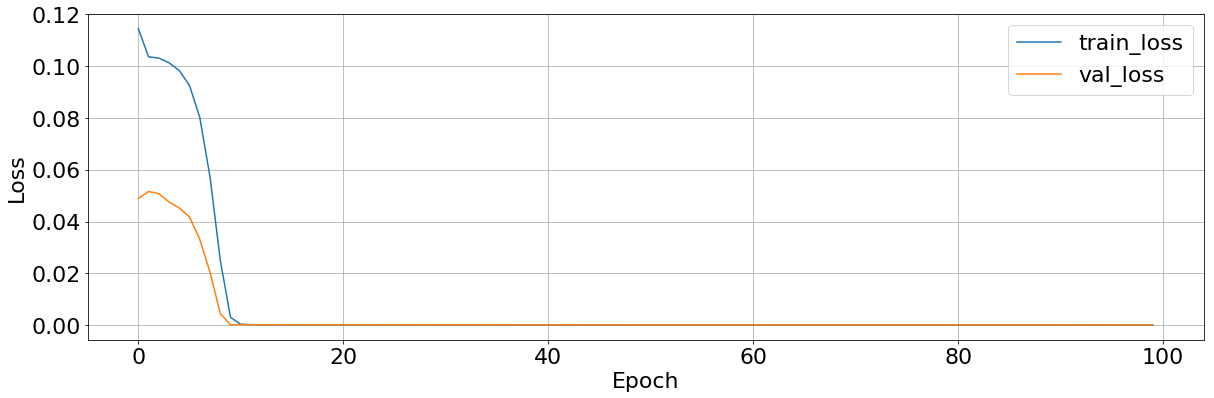

In [19]:
plot_loss(history.history['loss'], history.history['val_loss'])

# [3] Получить предсказание на test и визуализировать его

Использовать функцию denormalize

In [20]:
my_predict = my_model.predict(X_test).reshape(-1,1)

In [21]:
def denormalize(df,norm_data):
    values = df['Close'].values.reshape(-1,1)
    scl = MinMaxScaler()
    scl.fit(values)
    new = scl.inverse_transform(norm_data)
    return new

In [22]:
my_predict = denormalize(df_test, my_predict)

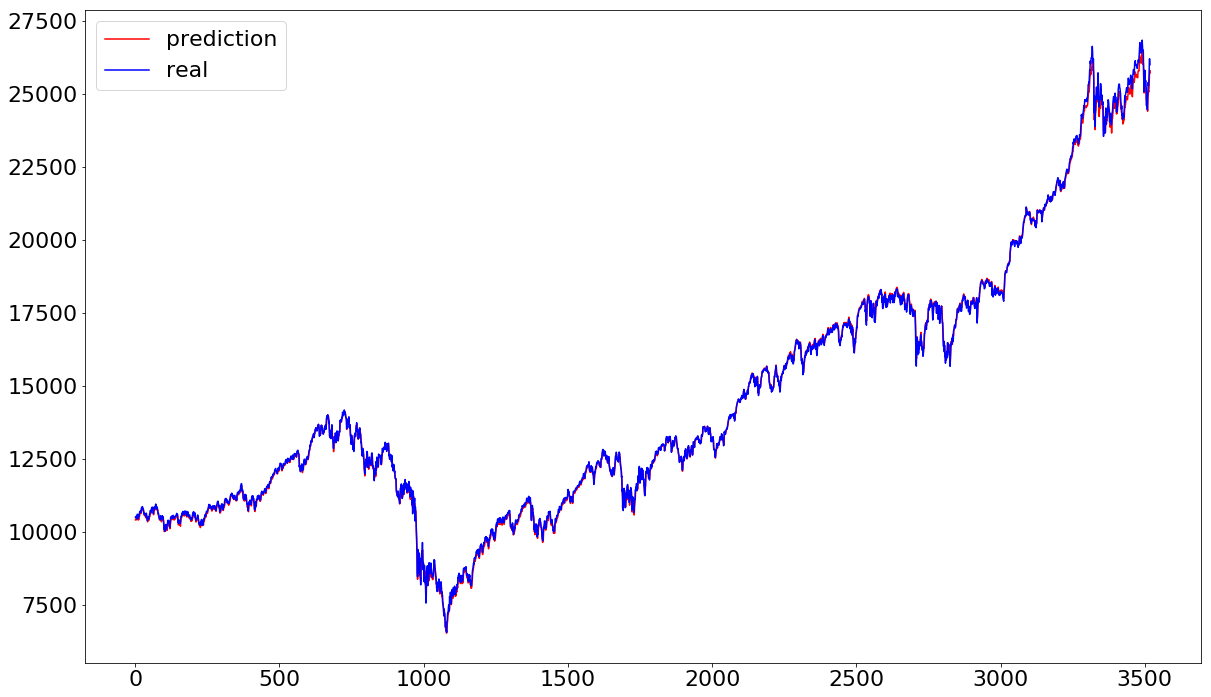

In [23]:
size = 3518
plt.figure(figsize=(20,12))
plt.plot(np.linspace(1,size,size), my_predict.reshape(3518), 'r', label='prediction')
plt.plot(np.linspace(1,size,size), df_test['Close'].values, 'b', label='real')
plt.legend();